In [6]:
# 标题高频关键词与播放量/互动率分析

# 词云 + 相关性分析
# 关键词效果对比（如‘教程’‘测评’）
!pip install wordcloud
import sys
sys.path.append('../src')

import text_utils
import stats_utils

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np


# 1. 读取数据
df = pd.read_csv('../data/processed/merged_data.csv')
df = df.dropna(subset=['title', 'play_count'])
df['play_count'] = df['play_count'].astype(float)
df['互动率'] = (df['like'] + df['reply'] + df['favorite'] + df['coin'] + df['share']) / df['play_count']


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 217.6 kB/s eta 0:00:00a 0:00:01


In [7]:
# 2. 分词
words = text_utils.segment_titles(df['title'])
top_words = text_utils.get_top_words(words, top_n=30)
print('高频词:', top_words)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/rk/st_t1zp53vzdsgwwzv3kbdxw0000gn/T/jieba.cache
Loading model cost 0.364 seconds.
Prefix dict has been built succesfully.


高频词: [('...', 256), ('一些', 86), ('今天', 83), ('网上', 62), ('买来', 60), ('玩具', 50), ('收到', 36), ('一下', 26), ('广告', 25), ('什么', 22), ('开箱', 17), ('一次', 16), ('摸鱼', 15), ('体验', 15), ('寄来', 14), ('生活', 13), ('大家', 13), ('为了', 12), ('终于', 12), ('故事', 12), ('但是', 11), ('那天', 11), ('多多', 11), ('事务所', 10), ('拍摄', 10), ('甲方', 9), ('时候', 9), ('各种各样', 9), ('礼盒', 9), ('没想到', 9)]


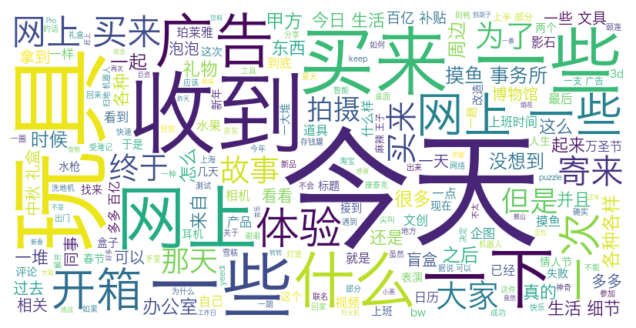

In [17]:
# 3. 词云
# 如需中文字体，指定 font_path='/System/Library/Fonts/PingFang.ttc' 或其他
text_utils.plot_wordcloud(words, font_path='Desktop/DA_project/摸鱼事务所分析/notebooks/Hiragino Sans GB.ttc')


In [19]:
# 4. 高频词与播放量/互动率的相关性分析
results = []
for word, freq in top_words:
    mask = df['title'].apply(lambda x: word in str(x))
    avg_play = df.loc[mask, 'play_count'].mean()
    avg_interact = df.loc[mask, '互动率'].mean()
    results.append({'word': word, 'freq': freq, 'avg_play': avg_play, 'avg_interact': avg_interact, 'count': mask.sum()})
result_df = pd.DataFrame(results)

In [21]:
# 皮尔逊相关性
play_corr = stats_utils.pearson_corr(result_df['freq'], result_df['avg_play'])
interact_corr = stats_utils.pearson_corr(result_df['freq'], result_df['avg_interact'])
print('词频-播放量相关性:', play_corr)
print('词频-互动率相关性:', interact_corr)
result_df.sort_values('avg_play', ascending=False)


词频-播放量相关性: {'corr': 0.4042163230810582, 'p_value': 0.026731229636242648}
词频-互动率相关性: {'corr': 0.15330383772506076, 'p_value': 0.4186313078461939}


,word,freq,avg_play,avg_interact,count
5,玩具,50,1.511440e+06,0.088245,50
3,网上,62,1.459871e+06,0.090603,62
4,买来,60,1.451233e+06,0.089182,60
1,一些,86,1.335302e+06,0.090625,86
27,各种各样,9,1.236111e+06,0.092431,9
0,...,256,1.096544e+06,0.086862,241
2,今天,83,9.822143e+05,0.085322,84
14,寄来,14,9.817857e+05,0.097680,14
10,开箱,17,9.738824e+05,0.080340,17
22,多多,11,9.510909e+05,0.088454,11


In [23]:
# 5. 关键词效果对比（如‘教程’‘测评’）
for kw in ['教程', '测评', '开箱', '吐槽', '记录']:
    mask = df['title'].str.contains(kw)
    print(f'含“{kw}”的数量:', mask.sum(), '平均播放量:', df.loc[mask, 'play_count'].mean(), '平均互动率:', df.loc[mask, '互动率'].mean())

含“教程”的数量: 1 平均播放量: 168000.0 平均互动率: 0.03942261904761905
含“测评”的数量: 0 平均播放量: nan 平均互动率: nan
含“开箱”的数量: 17 平均播放量: 973882.3529411765 平均互动率: 0.08033973890727268
含“吐槽”的数量: 1 平均播放量: 152000.0 平均互动率: 0.056197368421052635
含“记录”的数量: 1 平均播放量: 763000.0 平均互动率: 0.06411009174311927
